In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
books = pd.read_csv('/kaggle/input/bookdata/BooksDataSet.csv')
books = books.drop(['Unnamed: 0'], axis=1)
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [3]:
books['genre'].value_counts()

genre
Fantasy             500
Science Fiction     500
Crime Fiction       500
Historical novel    500
Horror              500
Thriller            500
Name: count, dtype: int64

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


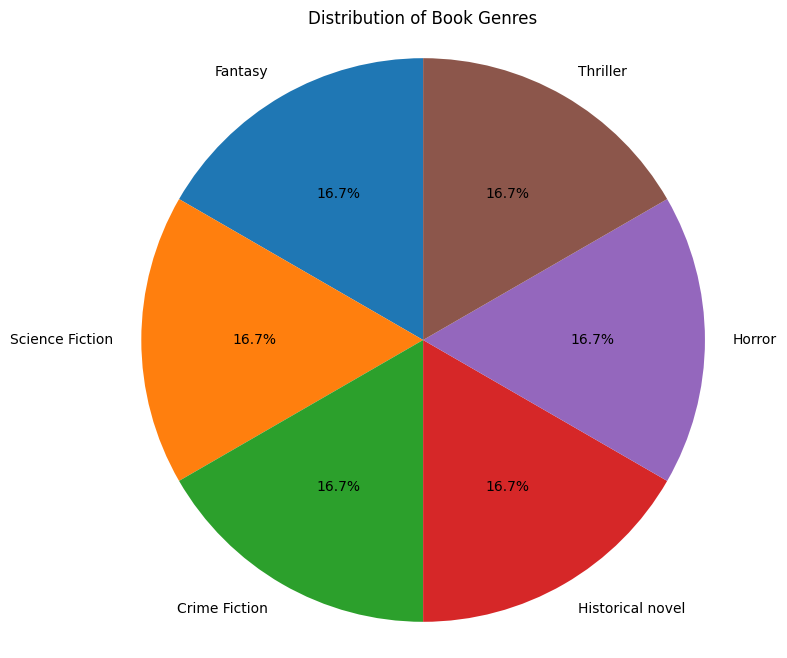

In [5]:
import matplotlib.pyplot as plt

# Assuming 'genre' column exists in the 'books' DataFrame
genre_counts = books['genre'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Genres')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [6]:
from IPython.display import HTML

# Assuming 'summary' column exists and is not empty
if 'summary' in books.columns and not books['summary'].isnull().all():
    summary_text = books['summary'].iloc[1]
    if pd.notna(summary_text):  # Check if the summary is not NaN
        colored_summary = f"<div style='text-align:justify; color:blue; font-size:14pt;'>{summary_text}</div>"
        display(HTML(colored_summary))
    else:
        print("The summary at index 1 is empty or NaN.")
else:
    print("The 'summary' column does not exist or is entirely empty/NaN.")

In [7]:
from IPython.display import HTML

# Assuming 'summary' column exists and is not empty
if 'summary' in books.columns and not books['summary'].isnull().all():
    summary_text = books['summary'].iloc[200]
    if pd.notna(summary_text):  # Check if the summary is not NaN
        colored_summary = f"<div style='text-align:justify; color:Red; font-size:14pt;'>{summary_text}</div>"
        display(HTML(colored_summary))
    else:
        print("The summary at index 1 is empty or NaN.")
else:
    print("The 'summary' column does not exist or is entirely empty/NaN.")

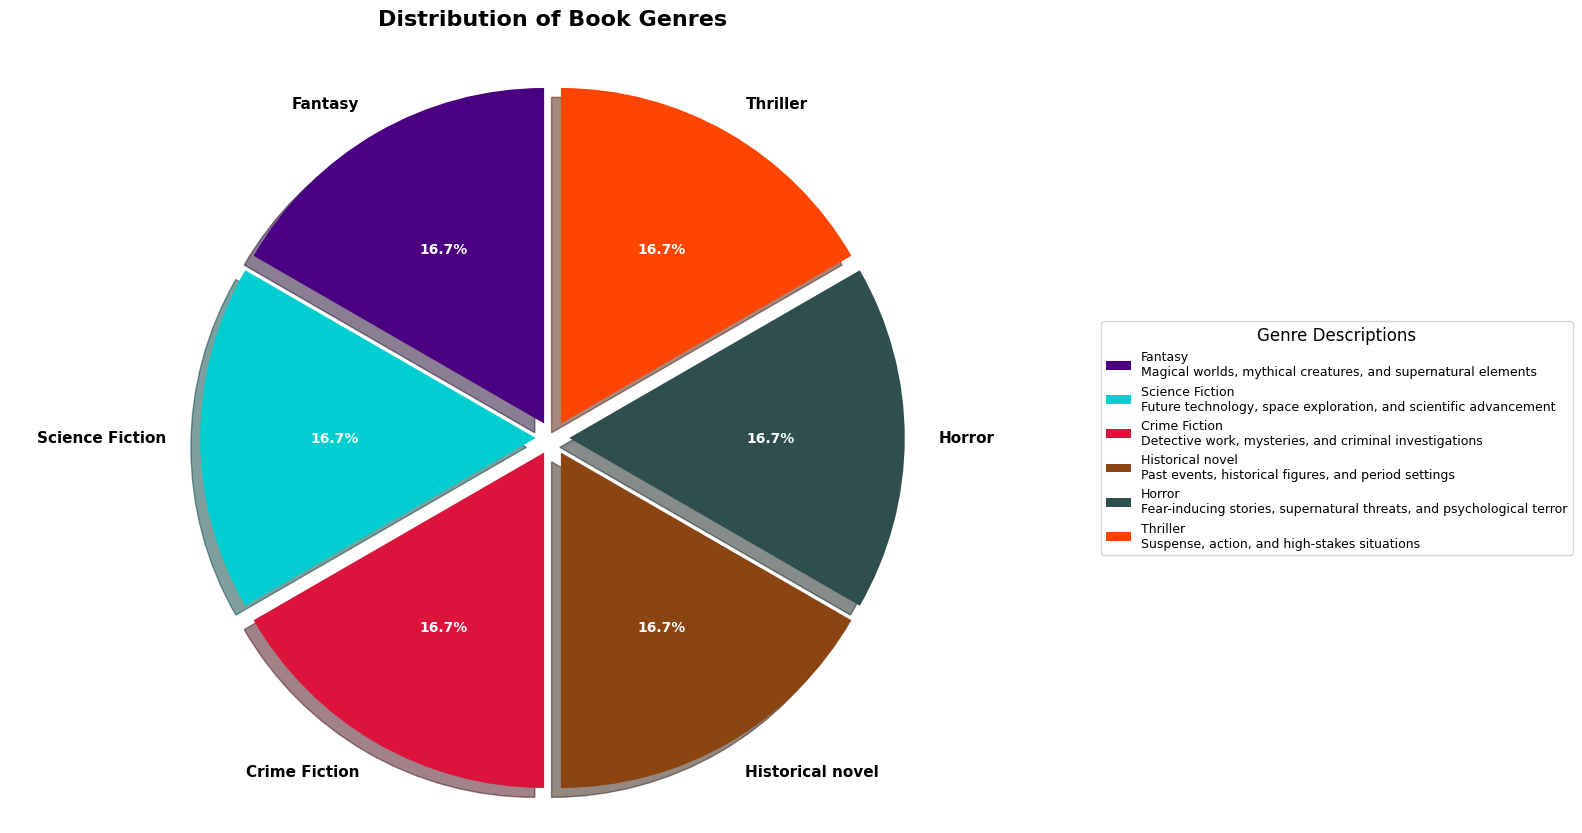

CPU times: user 593 ms, sys: 220 ms, total: 813 ms
Wall time: 552 ms


In [8]:
%%time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
import nltk
from collections import Counter
import re

class BookAnalyzer:
    def __init__(self, csv_path):
        """Initialize the BookAnalyzer with the dataset path"""
        self.books = pd.read_csv(csv_path)
        if 'Unnamed: 0' in self.books.columns:
            self.books = self.books.drop(['Unnamed: 0'], axis=1)
        
        # Updated genre colors with richer, more distinctive hex codes
        self.genre_colors = {
            'Fantasy': '#4B0082',           # Deep Indigo - mystical and magical
            'Science Fiction': '#00CED1',    # Dark Turquoise - futuristic and tech-inspired
            'Crime Fiction': '#DC143C',      # Crimson - intense and dramatic
            'Historical novel': '#8B4513',   # Saddle Brown - aged and classic
            'Horror': '#2F4F4F',            # Dark Slate Gray - dark and mysterious
            'Thriller': '#FF4500',          # Orange Red - high energy and suspense
        }
        
        # Add genre descriptions
        self.genre_descriptions = {
            'Fantasy': 'Magical worlds, mythical creatures, and supernatural elements',
            'Science Fiction': 'Future technology, space exploration, and scientific advancement',
            'Crime Fiction': 'Detective work, mysteries, and criminal investigations',
            'Historical novel': 'Past events, historical figures, and period settings',
            'Horror': 'Fear-inducing stories, supernatural threats, and psychological terror',
            'Thriller': 'Suspense, action, and high-stakes situations'
        }

    def plot_genre_distribution(self):
        """Create an enhanced pie chart of genre distribution with improved styling"""
        genre_counts = self.books['genre'].value_counts()
        
        plt.figure(figsize=(14, 10))
        colors = [self.genre_colors.get(genre, '#2C3E50') for genre in genre_counts.index]
        
        wedges, texts, autotexts = plt.pie(genre_counts, 
                                         labels=genre_counts.index,
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=colors,
                                         shadow=True,
                                         explode=[0.05] * len(genre_counts))  # Added explode effect
        
        # Enhanced label and percentage appearance
        plt.setp(autotexts, size=10, weight="bold", color='white')
        plt.setp(texts, size=11, weight="bold")
        
        plt.title('Distribution of Book Genres', size=16, pad=20, weight='bold')
        plt.axis('equal')
        
        # Enhanced legend with descriptions
        legend_labels = [f"{genre}\n{self.genre_descriptions[genre]}" 
                        for genre in genre_counts.index]
        
        plt.legend(wedges, legend_labels,
                  title="Genre Descriptions",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1),
                  fontsize=9,
                  title_fontsize=12)
        
        plt.show()

    def display_colored_summaries(self, max_books=5):
        """Display book summaries with genre-specific styling and themes"""
        styles = """
        <style>
            .book-container {
                margin: 25px 0;
                padding: 25px;
                border-radius: 12px;
                background-color: #f8f9fa;
                box-shadow: 0 6px 12px rgba(0,0,0,0.1);
                transition: all 0.3s ease;
            }
            
            /* Fantasy Theme */
            .fantasy-container {
                background: linear-gradient(to right, #f8f9fa, #f0f2ff);
                border-left: 5px solid #4B0082;
                border-right: 2px solid #8A2BE2;
            }
            .fantasy-container:hover {
                transform: translateY(-5px) rotate(0.5deg);
                box-shadow: 0 8px 20px rgba(75,0,130,0.2);
            }
            .fantasy-container .genre-label {
                text-shadow: 1px 1px 2px rgba(75,0,130,0.3);
            }
            
            /* Science Fiction Theme */
            .scifi-container {
                background: linear-gradient(to right, #f8f9fa, #f0ffff);
                border-left: 5px solid #00CED1;
                border-bottom: 2px solid #40E0D0;
            }
            .scifi-container:hover {
                transform: translateY(-5px) translateX(3px);
                box-shadow: 0 8px 20px rgba(0,206,209,0.2);
            }
            .scifi-container .metadata {
                font-family: 'Courier New', monospace;
            }
            
            /* Crime Fiction Theme */
            .crime-container {
                background: linear-gradient(to right, #f8f9fa, #fff5f5);
                border-left: 5px solid #DC143C;
                border-top: 2px solid #FF6B6B;
            }
            .crime-container:hover {
                transform: translateY(-5px) skew(-1deg);
                box-shadow: 0 8px 20px rgba(220,20,60,0.2);
            }
            .crime-container .summary-text {
                text-indent: 30px;
            }
            
            /* Historical Novel Theme */
            .historical-container {
                background: linear-gradient(to right, #f8f9fa, #fff9f0);
                border-left: 5px solid #8B4513;
                border: 2px solid #DEB887;
                border-left: 5px solid #8B4513;
            }
            .historical-container:hover {
                transform: translateY(-5px);
                box-shadow: 0 8px 20px rgba(139,69,19,0.2);
            }
            .historical-container .genre-description {
                font-family: 'Georgia', serif;
            }
            
            /* Horror Theme */
            .horror-container {
                background: linear-gradient(to right, #f8f9fa, #f2f2f2);
                border-left: 5px solid #2F4F4F;
                border-right: 2px solid #4A4A4A;
            }
            .horror-container:hover {
                transform: translateY(-5px) scale(1.01);
                box-shadow: 0 8px 20px rgba(47,79,79,0.3);
            }
            .horror-container .genre-label {
                letter-spacing: 3px;
            }
            
            /* Thriller Theme */
            .thriller-container {
                background: linear-gradient(to right, #f8f9fa, #fff5f0);
                border-left: 5px solid #FF4500;
                border-bottom: 2px solid #FF6347;
            }
            .thriller-container:hover {
                transform: translateY(-5px) translateX(-3px);
                box-shadow: 0 8px 20px rgba(255,69,0,0.2);
            }
            .thriller-container .summary-text {
                line-height: 2;
            }
            
            /* Common Styles */
            .genre-label {
                font-weight: bold;
                font-size: 20px;
                margin-bottom: 15px;
                text-transform: uppercase;
                letter-spacing: 1.5px;
                color: var(--genre-color);
            }
            .genre-description {
                font-style: italic;
                color: #666;
                margin-bottom: 15px;
                font-size: 14px;
            }
            .summary-text {
                text-align: justify;
                font-size: 16px;
                line-height: 1.8;
                font-family: 'Arial', sans-serif;
                color: #333;
            }
            .metadata {
                margin-top: 15px;
                font-size: 13px;
                color: #666;
                border-top: 1px solid #eee;
                padding-top: 10px;
            }
        </style>
        """
        display(HTML(styles))

        genre_classes = {
            'Fantasy': 'fantasy-container',
            'Science Fiction': 'scifi-container',
            'Crime Fiction': 'crime-container',
            'Historical novel': 'historical-container',
            'Horror': 'horror-container',
            'Thriller': 'thriller-container'
        }

        displayed_count = 0
        for idx, row in self.books.iterrows():
            if displayed_count >= max_books:
                break

            summary = row.get('summary')
            genre = row.get('genre')
            
            if pd.notna(summary) and pd.notna(genre):
                color = self.genre_colors.get(genre, '#2C3E50')
                description = self.genre_descriptions.get(genre, '')
                container_class = genre_classes.get(genre, '')
                
                html_content = f"""
                <div class='book-container {container_class}' style='--genre-color: {color};'>
                    <div class='genre-label'>
                        {genre}
                    </div>
                    <div class='genre-description'>
                        {description}
                    </div>
                    <div class='summary-text'>
                        {summary}
                    </div>
                    <div class='metadata'>
                        <span style='color: {color};'>📚</span> Book Index: {idx + 1}
                        {f" | ✍️ Author: {row.get('author', 'Unknown')}" if 'author' in self.books.columns else ""}
                        {f" | 📅 Year: {row.get('year', 'Unknown')}" if 'year' in self.books.columns else ""}
                    </div>
                </div>
                """
                display(HTML(html_content))
                displayed_count += 1

        if displayed_count == 0:
            print("No valid summaries found to display.")

def main():
    # Initialize analyzer with your dataset
    analyzer = BookAnalyzer('/kaggle/input/bookdata/BooksDataSet.csv')
    
    # Create genre distribution visualization
    analyzer.plot_genre_distribution()
    
    # Display colored summaries
    analyzer.display_colored_summaries(max_books=5)

if __name__ == "__main__":
    main()

In [9]:
import re

def clean_text(text):
    # Remove special symbols and convert text to lowercase in one step
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text

books['summary'] = books['summary'].apply(clean_text)
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

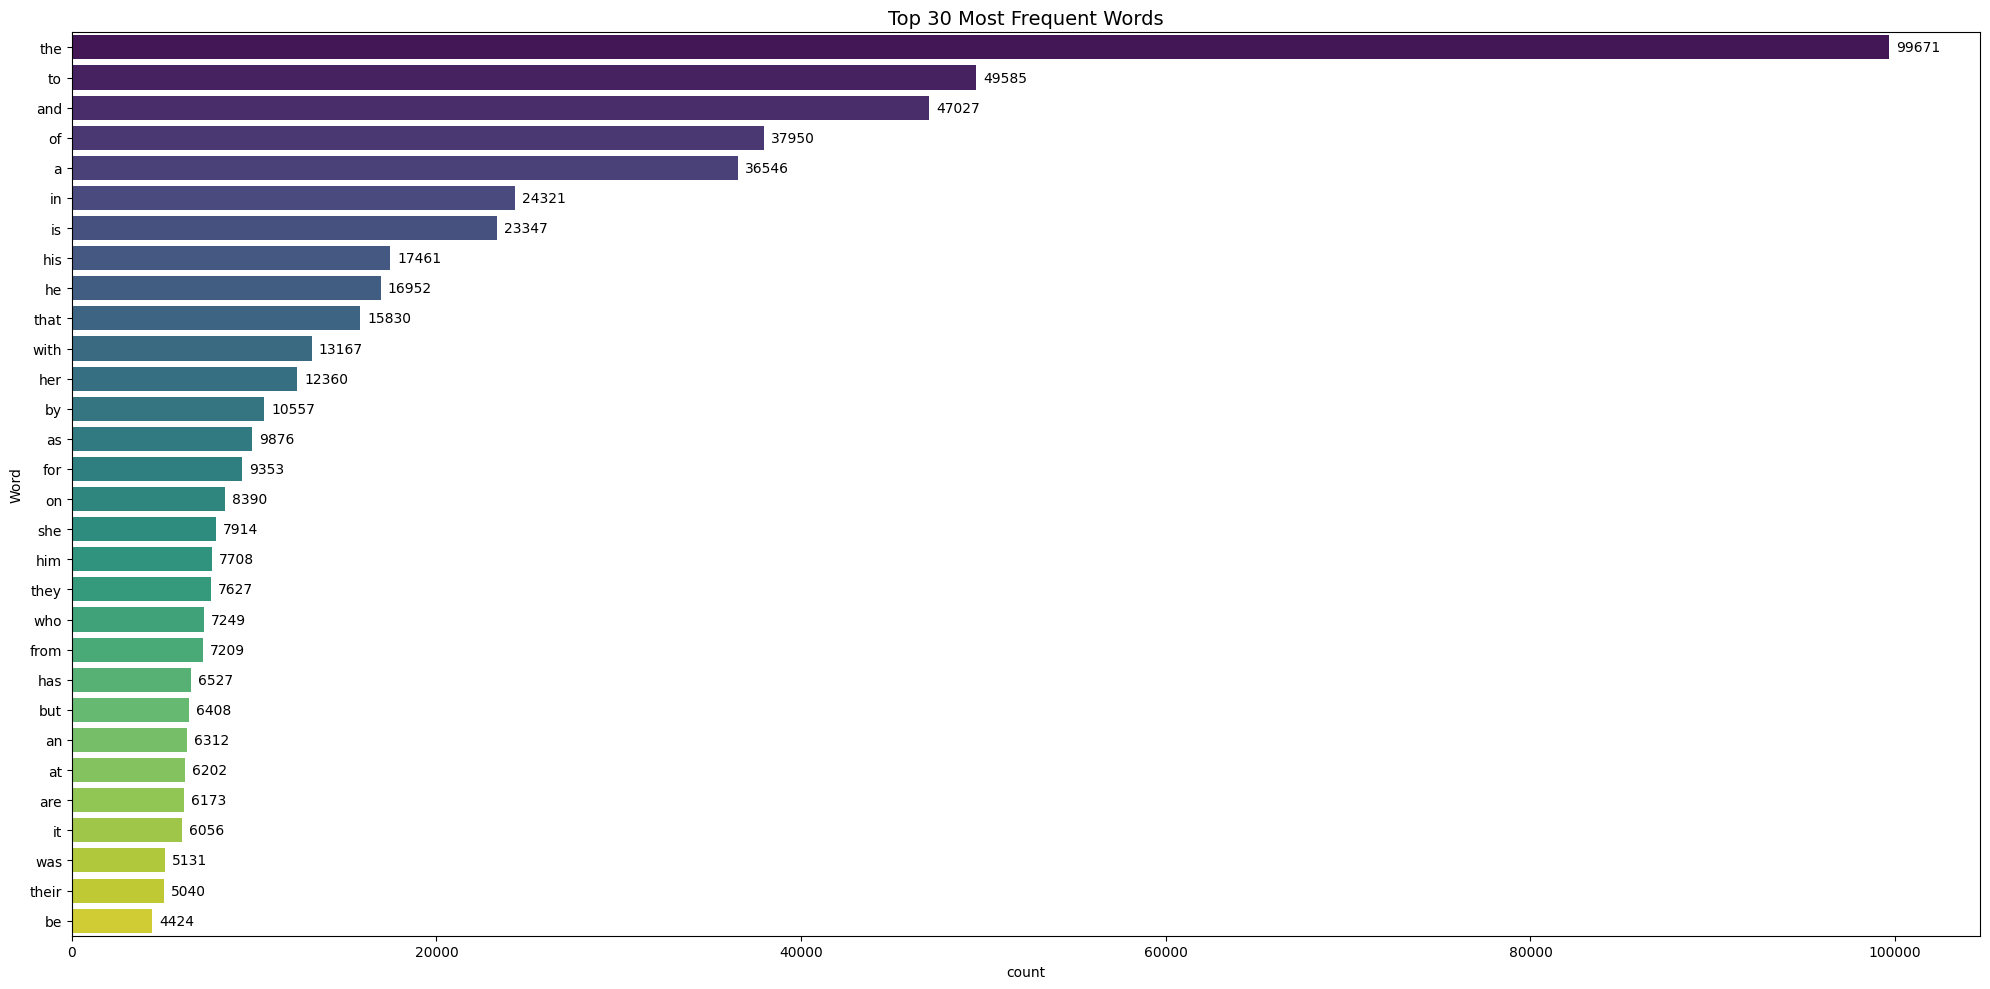

In [10]:
import warnings
warnings.filterwarnings('ignore')


def showmostfrequentwords(text, no_of_words):
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    wordsdf = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    df = wordsdf.nlargest(columns="count", n=no_of_words)
    plt.figure(figsize=(20, 10))  # Increased figure size for better readability
    ax = sn.barplot(data=df, x='count', y='word', palette="viridis")  # Using a different color palette
    ax.set(ylabel='Word')
    ax.set_title(f"Top {no_of_words} Most Frequent Words", fontsize=14)  # Added title
    
    # Annotate bars with their count values
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center',
                    xytext=(5, 0), textcoords='offset points', fontsize=10) # Adjusted for visibility

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
    return wordsdf

wordsdf = showmostfrequentwords(books['summary'], 30)

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply the function to the 'summary' column
books['summary'] = books['summary'].apply(remove_stopwords)
books['summary'].iloc[3]

if 'summary' in books.columns and not books['summary'].isnull().all():
    summary_text = books['summary'].iloc[3] # Access the summary at index 1
    if pd.notna(summary_text):  # Check if the summary is not NaN
        colored_summary = f"<div style='text-align:justify; color:blue; font-size:14pt;'>{summary_text}</div>"
        display(HTML(colored_summary))
    else:
        print("The summary at index 1 is empty or NaN.")
else:
    print("The 'summary' column does not exist or is entirely empty/NaN.")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('omw-1.4', quiet=True)

class TextStemmer:
    def __init__(self, remove_stopwords=False):
        """
        Initialize stemmer with optional stopword removal.
        
        Args:
            remove_stopwords (bool): Whether to remove stopwords during processing
        """
        self.stemmer = PorterStemmer()
        self.stem_cache = {}
        self.remove_stopwords = remove_stopwords
        if remove_stopwords:
            self.stop_words = set(stopwords.words('english'))
    
    def stem_text(self, text):
        """
        Stem text efficiently using caching and optimized string joining.
        
        Args:
            text (str): Input text to stem
            
        Returns:
            str: Stemmed text
        """
        if not isinstance(text, str):
            return ""
        
        # Tokenize and convert to lowercase once
        words = word_tokenize(text.lower())
        
        # Filter stopwords if enabled
        if self.remove_stopwords:
            words = [word for word in words if word not in self.stop_words]
        
        # Use list comprehension with cache lookup for stemming
        stemmed_words = [
            self.stem_cache.setdefault(word, self.stemmer.stem(word))
            for word in words
        ]
        
        # Join words efficiently
        return ' '.join(stemmed_words)
    
    def process_dataframe(self, df, column):
        """
        Process an entire dataframe column efficiently.
        
        Args:
            df (pd.DataFrame): Input dataframe
            column (str): Column name to process
            
        Returns:
            pd.Series: Series with stemmed text
        """
        return df[column].astype(str).apply(self.stem_text)
    
    def get_example(self, df, column, index):
        """
        Get a specific example from the processed dataframe.
        
        Args:
            df (pd.DataFrame): Input dataframe
            column (str): Column name
            index (int): Row index
            
        Returns:
            str: Processed text at specified index
        """
        return df[column].iloc[index]

# Usage example
stemmer = TextStemmer(remove_stopwords=True)  # Initialize with stopword removal

# Process the entire dataframe
books['summary'] = stemmer.process_dataframe(books, 'summary')

# Get specific example
example = stemmer.get_example(books, 'summary', 1)
print(f"Processed example: {example}")

Processed example: book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword use battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piperand leo told demigod taken back camp halfblood meet greek demigod children like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeuss demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thali

In [13]:
books['genre'] = pd.factorize(books['genre'])[0]
books

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...
3,5969644,Magic's Promise,0,book open heraldmag vanyel return countri vald...
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...
...,...,...,...,...
2995,10372180,White Death,5,novel numa file kurt austin adventur novel mai...
2996,14504372,Venus with Pistol,5,gilbert kemp dealer special antiqu gun london ...
2997,3617412,Blackwater,5,know your deep davey alway live shadow older b...
2998,11320975,The Rainbow and the Rose,5,stori concern life johnni pasco retir commerci...


In [14]:
books['genre'] = pd.factorize(books['genre'])[0]
books

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...
3,5969644,Magic's Promise,0,book open heraldmag vanyel return countri vald...
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...
...,...,...,...,...
2995,10372180,White Death,5,novel numa file kurt austin adventur novel mai...
2996,14504372,Venus with Pistol,5,gilbert kemp dealer special antiqu gun london ...
2997,3617412,Blackwater,5,know your deep davey alway live shadow older b...
2998,11320975,The Rainbow and the Rose,5,stori concern life johnni pasco retir commerci...


In [15]:
count_vec = CountVectorizer(max_df=0.90,min_df=2,
                            max_features=1000,stop_words='english')
bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,test_size=0.2)
X_train.shape,X_test.shape

((2400, 1000), (600, 1000))

In [16]:
%%time

import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm

# Custom Dataset class
class BookDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def train_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    
    for batch in tqdm(data_loader, desc="Training"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    return total_loss / len(data_loader)

def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)
            
            predictions.extend(preds.cpu().numpy())
            actual_labels.extend(labels.cpu().numpy())
    
    return accuracy_score(actual_labels, predictions)

# Main execution
def train_roberta_classifier(books, num_epochs=3, batch_size=16):
    # Prepare data
    X_train, X_test, y_train, y_test = train_test_split(
        books['summary'].values, 
        books['genre'].values, 
        test_size=0.2, 
        random_state=42
    )
    
    # Initialize tokenizer and encode labels
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    # Create datasets
    train_dataset = BookDataset(X_train, y_train_encoded, tokenizer)
    test_dataset = BookDataset(X_test, y_test_encoded, tokenizer)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    # Initialize model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=len(label_encoder.classes_)
    ).to(device)
    
    # Initialize optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    
    # Training loop
    best_accuracy = 0
    
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        avg_loss = train_epoch(model, train_loader, optimizer, device)
        accuracy = evaluate(model, test_loader, device)
        
        print(f"Average loss: {avg_loss:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            # Optionally save the best model
            # torch.save(model.state_dict(), 'best_model.pth')
    
    return model, label_encoder, best_accuracy

# Example usage
if __name__ == "__main__":
    # Assuming 'books' DataFrame is already loaded
    model, label_encoder, best_accuracy = train_roberta_classifier(books)
    print(f"\nBest accuracy achieved: {best_accuracy:.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3


Evaluating: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]


Average loss: 1.4216
Accuracy: 0.6533

Epoch 2/3


Evaluating: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]


Average loss: 0.9330
Accuracy: 0.6767

Epoch 3/3


Evaluating: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]

Average loss: 0.7305
Accuracy: 0.6833

Best accuracy achieved: 0.6833
CPU times: user 12min 12s, sys: 2.18 s, total: 12min 14s
Wall time: 12min 21s


In [17]:
%%time

import torch
from transformers import RobertaTokenizer
import pandas as pd
import numpy as np

def predict_genre(text, model, tokenizer, label_encoder, device, max_length=512):
    """
    Predict genre for a single text using the trained RoBERTa model
    """
    # Prepare the text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, prediction = torch.max(outputs.logits, dim=1)
    
    # Convert prediction to genre label
    predicted_genre = label_encoder.inverse_transform([prediction.item()])[0]
    return predicted_genre

def predict_genres_batch(texts, model, tokenizer, label_encoder, device, batch_size=32, max_length=512):
    """
    Predict genres for a batch of texts
    """
    model.eval()
    predictions = []
    
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        
        # Prepare batch
        encodings = tokenizer(
            batch_texts.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        # Move to device
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)
        
        # Get predictions
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, batch_predictions = torch.max(outputs.logits, dim=1)
        
        # Convert predictions to genre labels
        batch_genres = label_encoder.inverse_transform(batch_predictions.cpu().numpy())
        predictions.extend(batch_genres)
    
    return predictions

def evaluate_model_performance(books, model, tokenizer, label_encoder):
    """
    Evaluate model performance and add predictions to the books DataFrame
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Get predictions for all books
    predicted_genres = predict_genres_batch(
        books['summary'],
        model,
        tokenizer,
        label_encoder,
        device
    )
    
    # Add predictions to DataFrame
    books_with_predictions = books.copy()
    books_with_predictions['predicted_genre'] = predicted_genres
    
    # Calculate accuracy
    accuracy = (books_with_predictions['genre'] == books_with_predictions['predicted_genre']).mean()
    
    return books_with_predictions, accuracy

# Example usage
def main():
    # Assuming we have our trained model, label_encoder from the previous code
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    
    # Load your books DataFrame
    # books = pd.read_csv('your_books_data.csv')  # Uncomment and modify as needed
    
    # Evaluate model and get predictions
    books_with_predictions, accuracy = evaluate_model_performance(
        books,
        model,  # Your trained model from previous code
        tokenizer,
        label_encoder  # Your label encoder from previous code
    )
    
    # Display results
    print(f"\nModel Accuracy: {accuracy:.4f}")
    print("\nSample Predictions:")
    print(books_with_predictions[['genre', 'predicted_genre', 'summary']].head())
    
    # Optionally save results
    # books_with_predictions.to_csv('predictions_results.csv', index=False)
    
    return books_with_predictions

if __name__ == "__main__":
    books_with_predictions = main()


Model Accuracy: 0.8160

Sample Predictions:
   genre  predicted_genre                                            summary
0      0                0  drown wednesday first truste among morrow day ...
1      0                0  book open jason awaken school bu unabl rememb ...
2      0                0  cugel easili persuad merchant fianosth attempt...
3      0                0  book open heraldmag vanyel return countri vald...
4      0                0  taran gurgi return caer dallben follow event t...
CPU times: user 1min 38s, sys: 45.9 ms, total: 1min 38s
Wall time: 1min 38s


In [18]:
print("\nSample Predictions:")
books_with_predictions[['genre', 'predicted_genre', 'summary']].head()


Sample Predictions:


,genre,predicted_genre,summary
0,0,0,drown wednesday first truste among morrow day ...
1,0,0,book open jason awaken school bu unabl rememb ...
2,0,0,cugel easili persuad merchant fianosth attempt...
3,0,0,book open heraldmag vanyel return countri vald...
4,0,0,taran gurgi return caer dallben follow event t...


In [19]:
books_with_predictions[['genre', 'predicted_genre', 'summary']].sample(10)

,genre,predicted_genre,summary
1535,3,3,midth centuri father gstir sent bavaria canada...
1317,2,2,week rebuss retir rebu clark investig death fa...
414,0,0,amurtaht black dragon exist plagu fief heltant...
1812,3,5,tale pick month conclus david liss first novel...
19,0,0,six month took control territori crimin organ ...
927,1,1,cassi come home owl morph find horkbajir leav ...
2484,4,4,golden reveal thing plotlin interview slayerli...
1716,3,3,beefsteak club lord john grey introduc robert ...
2441,4,1,novel take place event umbrella conspiraci res...
900,1,1,presentday megatron lie dead bottom sea cut gu...


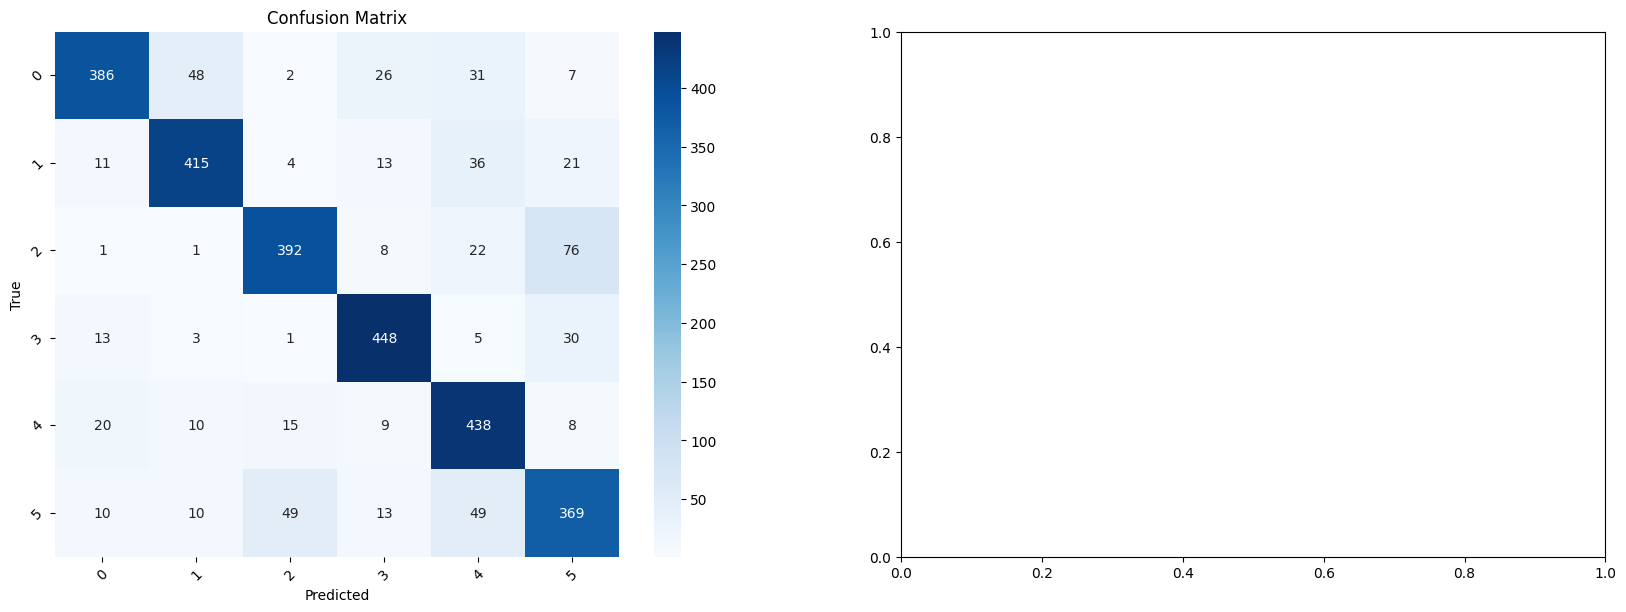

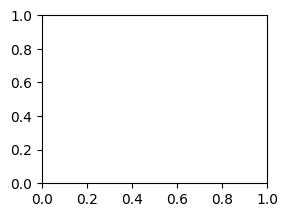

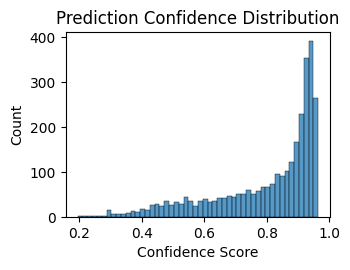


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       500
           1       0.85      0.83      0.84       500
           2       0.85      0.78      0.81       500
           3       0.87      0.90      0.88       500
           4       0.75      0.88      0.81       500
           5       0.72      0.74      0.73       500

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



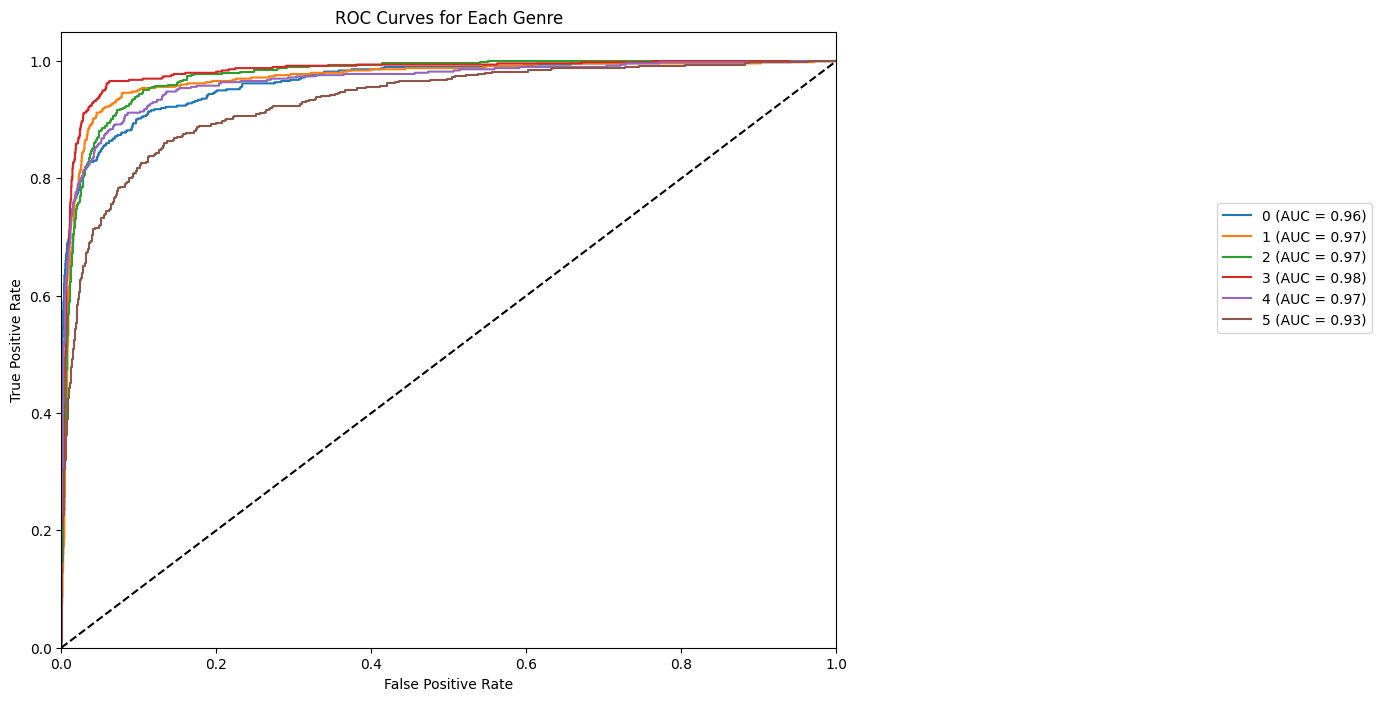


Additional Metrics:
Total Samples: 3000
Correct Predictions: 2448
Overall Accuracy: 0.8160

Per-Genre Performance:
0:
  Total samples: 500
  Correct predictions: 386
  Accuracy: 0.7720
1:
  Total samples: 500
  Correct predictions: 415
  Accuracy: 0.8300
2:
  Total samples: 500
  Correct predictions: 392
  Accuracy: 0.7840
3:
  Total samples: 500
  Correct predictions: 448
  Accuracy: 0.8960
4:
  Total samples: 500
  Correct predictions: 438
  Accuracy: 0.8760
5:
  Total samples: 500
  Correct predictions: 369
  Accuracy: 0.7380
CPU times: user 3min 24s, sys: 926 ms, total: 3min 25s
Wall time: 3min 23s


In [20]:
%%time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(books_with_predictions, label_encoder, model, tokenizer, device):
    """
    Plot comprehensive metrics for model evaluation
    """
    true_labels = books_with_predictions['genre']
    predicted_labels = books_with_predictions['predicted_genre']

    # Set up the plotting style

    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))

    # 1. Confusion Matrix
    plt.subplot(2, 2, 1)
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    # 2. Genre Distribution
    plt.subplot(2, 2, 2)
    genre_counts = pd.DataFrame({
        'True': true_labels.value_counts(),
        'Predicted': pd.Series(predicted_labels).value_counts()
    }).fillna(0)
    genre_counts.plot(kind='bar')
    plt.title('Genre Distribution: True vs Predicted')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()

    # 3. Per-Class Accuracy
    plt.subplot(2, 2, 3)
    class_accuracy = pd.DataFrame({
        'Accuracy': classification_report(true_labels, predicted_labels, output_dict=True)['weighted avg']
    }, index=['Precision', 'Recall', 'F1-Score'])
    class_accuracy.plot(kind='bar')
    plt.title('Overall Model Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)

    # 4. Prediction Confidence Distribution
    plt.subplot(2, 2, 4)

    # Get prediction probabilities
    def get_prediction_probabilities(texts):
        model.eval()
        probs = []

        with torch.no_grad():
            for text in texts:
                encoding = tokenizer.encode_plus(
                    text,
                    add_special_tokens=True,
                    max_length=512,
                    padding='max_length',
                    truncation=True,
                    return_attention_mask=True,
                    return_tensors='pt'
                )

                input_ids = encoding['input_ids'].to(device)
                attention_mask = encoding['attention_mask'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                prob = torch.softmax(outputs.logits, dim=1).max(dim=1)[0]
                probs.append(prob.cpu().item())

        return probs

    prediction_probs = get_prediction_probabilities(books_with_predictions['summary'])
    sns.histplot(prediction_probs, bins=50)
    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Confidence Score')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

    # Plot ROC curves for each class
    plt.figure(figsize=(10, 8))

    # Prepare data for ROC curves
    y_test_bin = label_binarize(true_labels, classes=label_encoder.classes_)
    n_classes = len(label_encoder.classes_)

    # Get prediction probabilities for all classes
    def get_all_probabilities(texts):
        model.eval()
        all_probs = []

        with torch.no_grad():
            for text in texts:
                encoding = tokenizer.encode_plus(
                    text,
                    add_special_tokens=True,
                    max_length=512,
                    padding='max_length',
                    truncation=True,
                    return_attention_mask=True,
                    return_tensors='pt'
                )

                input_ids = encoding['input_ids'].to(device)
                attention_mask = encoding['attention_mask'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                probs = torch.softmax(outputs.logits, dim=1)
                all_probs.append(probs.cpu().numpy())

        return np.vstack(all_probs)

    y_score = get_all_probabilities(books_with_predictions['summary'])

    # Plot ROC curve for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Genre')
    plt.legend(loc="lower right", bbox_to_anchor=(1.7, 0.5))
    plt.show()

    # Calculate and display additional metrics
    correct_predictions = sum(true_labels == predicted_labels)
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions

    print(f"\nAdditional Metrics:")
    print(f"Total Samples: {total_predictions}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Overall Accuracy: {accuracy:.4f}")

    # Per-genre analysis
    print("\nPer-Genre Performance:")
    per_genre_accuracy = {}
    for genre in label_encoder.classes_:
        genre_mask = true_labels == genre
        genre_total = sum(genre_mask)
        genre_correct = sum((true_labels == predicted_labels) & genre_mask)
        genre_accuracy = genre_correct / genre_total if genre_total > 0 else 0
        per_genre_accuracy[genre] = genre_accuracy
        print(f"{genre}:")
        print(f"  Total samples: {genre_total}")
        print(f"  Correct predictions: {genre_correct}")
        print(f"  Accuracy: {genre_accuracy:.4f}")

    return per_genre_accuracy

def visualize_model_performance(books_with_predictions, model, label_encoder):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base') # Initialize tokenizer here
    per_genre_accuracy = plot_metrics(books_with_predictions, label_encoder, model, tokenizer, device) # Pass tokenizer to plot_metrics
    return per_genre_accuracy


if __name__ == "__main__":
    # ... your existing code ...

    visualize_model_performance(books_with_predictions, model, label_encoder) 

In [21]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

def predict_book_genre(model, label_encoder, tokenizer, text):
    """
    Predict the genre of a given book summary text.
    
    Parameters:
    model (RobertaForSequenceClassification): The trained RoBERTa classification model.
    label_encoder (LabelEncoder): The label encoder used to transform the labels.
    tokenizer (RobertaTokenizer): The tokenizer used to preprocess the input text.
    text (str): The book summary text to classify.
    
    Returns:
    str: The predicted genre of the book.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Encode the input text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Make the prediction
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, predicted_idx = torch.max(outputs.logits, dim=1)
        
    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform([predicted_idx.item()])[0]
    
    return predicted_label

# Example usage
if __name__ == "__main__":
    # Assuming you have the trained model, label encoder, and a book summary
    book_summary = "This is a captivating story about a young wizard who discovers a magical world hidden from the ordinary one."
    
    # Load the trained model and tokenizer
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_)).to(device)
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    
    prediction = predict_book_genre(model, label_encoder, tokenizer, book_summary)
    print(f"Predicted genre: {prediction}")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted genre: 0
